# Fundamentals of Deep Learning

### Recurrent Neural Networks

#### Julián D. Arias Londoño and Raúl Ramos Pollán 

Dept. of Systems Engineering and Computer Science  
Universidad de Antioquia, Medellín, Colombia  
julian.ariasl@udea.edu.co, raul.ramos@udea.edu.co, 

In [1]:
%matplotlib inline

Recurrent Neural Networks (RNN) are a family of neural networks designed to process sequential data. This type of networks are specially suitable for problems where every sample is a sequence of objects (values) with statistical dependence among them.

![alt text](./Images/RNN2.png "Neuronas")

An alternative view of the network 

![alt text](./Images/RNN3.png "Neuronas")

RNNs can be designed to solve different learning paradigms, in other words, they are able to adapt to different data configurations.

![alt text](./Images/RNN-Topol.jpeg "Neuronas")

Image taken from <a href="http://karpathy.github.io/2015/05/21/rnn-effectiveness/">Andrej Karpathy</a>

Examples:

- 1. Conventional MLP
- 2. Caption generation
- 3. Sentiment analysis
- 4. Language translation
- 5. Time series prediction


According to the notation in the in Figure 2, the mathematical formulation of an Elman RNN with one hidden layer and one output layer is given by:

$${\bf{a}}^{(t)} = {\bf{b}} + {\bf{V}}{\bf{h}}^{(t-1)} + {\bf{U}}{\bf{x}}^{(t)},\\ {\bf{h}}^{(t)} = \tanh({\bf{a}}^{(t)}), \\ {\bf{o}}^{(t)} = {\bf{c}} + {\bf{W}}{\bf{h}}^{(t)}$$

where $\bf{V}$ is the weights matrix of the feedback loop. $\bf{U}$ is the  weights matrix of the inputs and $\bf{W}$ is the weights matrix that contects the **state** of the network with the output layer. $\bf{b}$ and $\bf{c}$ are the bias vectors for the hidden and output layers respectively. The ouput of the network ${\bf{y}}^{(t)}$ corresponds to the application of the activation function to the values ${\bf{o}}^{(t)}$.

### Backpropagation through time (BPTT)

The first step for training a RNN is to define the loss function. Let's consider a sequence of length $\tau$, the loss for that single sequence can be expressed as: 

$$L(\{ {\bf{y}}^{(1)},{\bf{y}}^{(2)},\cdots,{\bf{y}}^{(\tau)} \}, \{ {\bf{\hat{y}}}^{(1)},{\bf{\hat{y}}}^{(2)},\cdots,{\bf{\hat{y}}}^{(\tau)} \}) \\
L = \sum_t L^{(t)}$$

If for instance the loss function for output $i$ is $L^{(t)} = -\log \hat{y}_i^{(t)}$, then

$$(\nabla_{{\bf{o}}^{(t)}}L)_i = \frac{\partial L}{\partial o_i^{(t)}} = \frac{\partial L}{\partial L^{(t)}} \frac{\partial L^{(t)}}{\partial \hat{y}_i^{(t)}} \frac{\partial \hat{y}_i^{(t)}}{\partial o_i^{(t)}} = \hat{y}_i^{(t)} - 1 \\ \nabla_{{\bf{o}}^{(t)}}L = {\bf{y}}^{(t)} \odot ({\bf{\hat{y}}}^{(t)} - {\bf{1}} )$$

where $\odot$ is the Hadamard product. When $t=\tau$, ${\bf{h}}^{(\tau)}$ only has ${\bf{o}}^{(\tau)}$ as descendent, so its gradient is simple:

$$ \nabla_{{\bf{h}}^{(\tau)}} L = {\bf{W}}^T\nabla_{{\bf{o}}^{(\tau)}}L$$

From this two results we can iterate backward in time to back-propagate gradients through time. From $t=\tau-1$ down to $\tau = 1$, ${\bf{h}}^{(t)}$ has two descendents: ${\bf{h}}^{(t+1)}$ and ${\bf{o}}^{(t)}$, therefore its gradient is given by:   

$$ \nabla_{{\bf{h}}^{(t)}}L = \left( \frac{\partial {\bf{h}}^{(t+1)}}{\partial {\bf{h}}^{(t)}}\right)^T(\nabla_{{\bf{h}}^{(t+1)}} L) + \left(\frac{\partial {\bf{o}}^{(t)}}{\partial {\bf{h}}^{(t)}}\right)^T(\nabla_{{\bf{o}}^{(t)}}L) \\
\nabla_{{\bf{h}}^{(t)}}L = {\bf{V}}^T\text{diag} \left( 1 - \left( {\bf{h}}^{(t+1)} \right)^2\right)(\nabla_{{\bf{h}}^{(t+1)}} L) + {\bf{W}}^T(\nabla_{{\bf{o}}^{(t)}}L)$$

Based on the former results, the rest of the gradients can be calculated as:

$$ \nabla_{\bf{c}} L = \sum_t \left(\frac{\partial {\bf{o}}^{(t)}}{\partial {\bf{c}}}\right)^T \nabla_{{\bf{o}}^{(t)}}L$$

$$ \nabla_{\bf{b}} L = \sum_t \left(\frac{\partial {\bf{h}}^{(t)}}{\partial {\bf{b}}}\right)^T \nabla_{{\bf{h}}^{(t)}}L = \sum_t \text{diag}\left( 1 - \left( {\bf{h}}^{(t)} \right)^2\right)\nabla_{{\bf{h}}^{(t)}} L $$

$$\nabla_{{\bf W}}L = \sum_t \sum_i \left(  \frac{\partial L}{\partial o_i^{(t)}} \right)^T \nabla_{{\bf W}} o_i^{(t)} = \sum_t (\nabla_{{\bf{o}}^{(t)}}L){\bf{h}}^{(t)^T}$$

$$\nabla_{\bf V}L = \sum_t \text{diag}\left( 1 - \left( {\bf{h}}^{(t)} \right)^2\right)(\nabla_{{\bf{h}}^{(t)}} L){\bf{h}}^{(t-1)^T}$$

$$ \nabla_{\bf U}L = \sum_t \text{diag}\left( 1 - \left( {\bf{h}}^{(t)} \right)^2\right)(\nabla_{{\bf{h}}^{(t)}} L){\bf{x}}^{(t)^T} $$

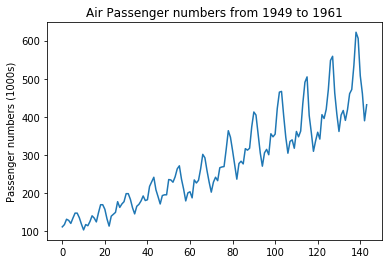

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
datasetO = pandas.read_csv('data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(datasetO)
plt.ylabel('Passenger numbers (1000s)')
plt.title('Air Passenger numbers from 1949 to 1961')
plt.show()

In [3]:
from libraries.DataPreparationRNN import split_sequence
from sklearn.preprocessing import MinMaxScaler
look_back=1
dataset = datasetO.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = split_sequence(testN, look_back)

In [4]:
print('Train',X_train[:10])
print('Test',y_train[:10])

Train [[[0.02588999]]

 [[0.04530746]]

 [[0.09061491]]

 [[0.08090615]]

 [[0.05501619]]

 [[0.10032365]]

 [[0.14239484]]

 [[0.14239484]]

 [[0.10355988]]

 [[0.04854369]]]
Test [[0.04530746]
 [0.09061491]
 [0.08090615]
 [0.05501619]
 [0.10032365]
 [0.14239484]
 [0.14239484]
 [0.10355988]
 [0.04854369]
 [0.        ]]


Let's do a first try using a MLP.

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
#keras.backend.clear_session()
model1 = Sequential()
model1.add(Dense(5,activation = 'relu',input_dim=1))
model1.add(Dense(1))
model1.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [6]:
model1.compile(optimizer='adam',loss='mse')
model1.fit(X_train.reshape(X_train.shape[0],look_back),y_train.flatten(),epochs=200, verbose=0)

In [7]:
from libraries.DataPreparationRNN import EstimaRMSE
trainPredict, testPredict = EstimaRMSE(model1,X_train,X_test,y_train,y_test,scaler,look_back)

Train Score: 40.56 RMSE
Test Score: 119.02 RMSE


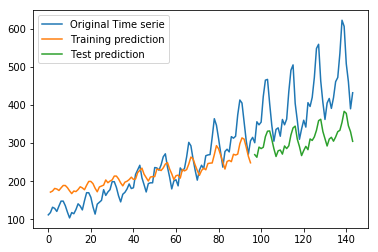

In [8]:
from libraries.DataPreparationRNN import PintaResultado
PintaResultado(dataset,trainPredict,testPredict,look_back)

Using two steps backward to predict one step ahead:

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
look_back = 2;
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = split_sequence(testN, look_back)
#keras.backend.clear_session()
model2 = Sequential()
model2.add(Dense(5,activation = 'relu',input_dim=look_back))
model2.add(Dense(1))
model2.compile(optimizer='adam',loss='mse')

Train Score: 24.93 RMSE
Test Score: 54.54 RMSE


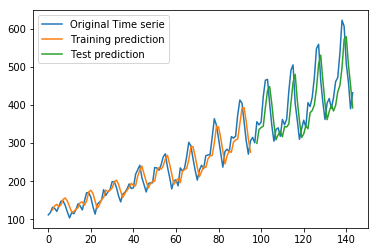

In [42]:
from libraries.DataPreparationRNN import EstimaRMSE
from libraries.DataPreparationRNN import PintaResultado
model2.fit(X_train.reshape(X_train.shape[0],look_back),y_train.reshape(X_train.shape[0],1),epochs=200, verbose=0)
trainPredict, testPredict = EstimaRMSE(model2,X_train,X_test,y_train,y_test,scaler,look_back)
PintaResultado(dataset,trainPredict,testPredict,look_back)

Train Score: 25.33 RMSE
Test Score: 66.04 RMSE


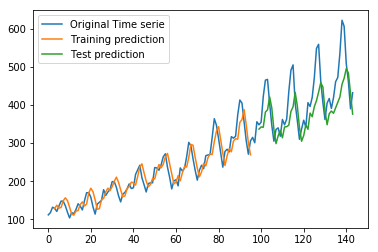

In [39]:
look_back = 3;
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = split_sequence(testN, look_back)
model3 = Sequential()
model3.add(Dense(5,activation = 'relu',input_dim=look_back))
model3.add(Dense(1))
model3.compile(optimizer='adam',loss='mse')
model3.fit(X_train.reshape(X_train.shape[0],look_back),y_train.flatten(),epochs=200, verbose=0)
trainPredict, testPredict = EstimaRMSE(model3,X_train,X_test,y_train,y_test,scaler,look_back)
PintaResultado(dataset,trainPredict,testPredict,look_back)

Take a look to the autocorrelation function:

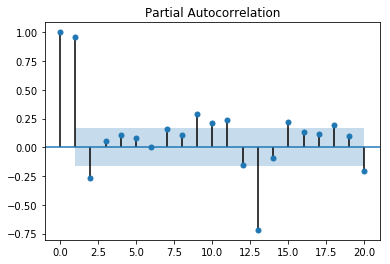

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(datasetO, lags=20)
plt.show()

There are problems where we have multiple time series to forecast one of them (**Multiple Input series**), or multiple time series to predict  all of them (**Multiple parallel series**)

**Arquitectures based on MLP**

Multiple Input Series

- Multiple Input: Combine the series at the input layer
- Multi-headed: One input layer per serie and the concatenation takes place in the output layer

Multiple parallel series

- Vector-output Model: Combine the series at the input layer and the output la layer contains one output per serie.
- Multi-output model: Combine the series at the input layer, share hidden layers and define a different output layer per serie.

**Now using a RNN layer instead of a Dense layer:**

Train Score: 22.92 RMSE
Test Score: 48.74 RMSE


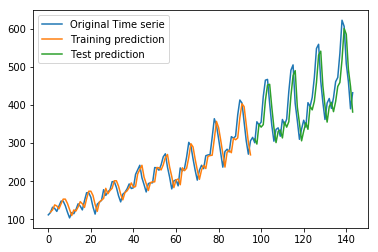

In [35]:
from keras.layers import SimpleRNN
from libraries.DataPreparationRNN import EstimaRMSE_RNN
from libraries.DataPreparationRNN import create_dataset
from libraries.DataPreparationRNN import PintaResultado
look_back = 1;
X_train, y_train = create_dataset(trainN, look_back)
X_test, y_test = create_dataset(testN, look_back)
model4 = Sequential()
model4.add(SimpleRNN(5,activation = 'relu',input_shape=(1,look_back)))
model4.add(Dense(1))
model4.compile(optimizer='adam',loss='mse')
model4.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=200, verbose=0)
trainPredict, testPredict = EstimaRMSE_RNN(model4,X_train,X_test,y_train,y_test,scaler,look_back,1)
PintaResultado(dataset,trainPredict,testPredict,look_back)

Two recurrent layers:

Train Score: 21.35 RMSE
Test Score: 56.96 RMSE


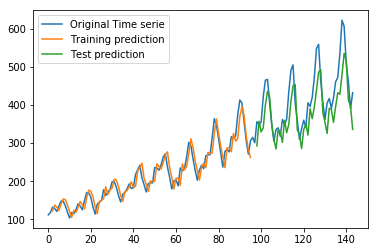

In [24]:
from keras.layers import RepeatVector
look_back = 2;
X_train, y_train = create_dataset(trainN, look_back)
X_test, y_test = create_dataset(testN, look_back)
model5 = Sequential()
#model.add(SimpleRNN(5,activation = 'relu',return_sequences=True,input_shape=(1,look_back)))
model5.add(SimpleRNN(5,activation = 'relu',input_shape=(1,look_back)))
model5.add(RepeatVector(1))
model5.add(SimpleRNN(5,activation = 'relu'))
model5.add(Dense(1))
model5.compile(optimizer='adam',loss='mse')
model5.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=200, verbose=0)
trainPredict, testPredict = EstimaRMSE_RNN(model5,X_train,X_test,y_train,y_test,scaler,look_back,1)
PintaResultado(dataset,trainPredict,testPredict,look_back)

Train Score: 25.52 RMSE
Test Score: 57.22 RMSE


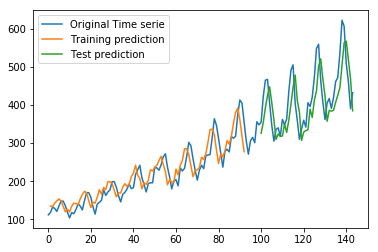

In [23]:
from keras.layers import RepeatVector
n_steps = 4;
X_train, y_train = create_dataset(trainN, n_steps)
X_test, y_test = create_dataset(testN, n_steps)
model6 = Sequential()
model6.add(SimpleRNN(5,activation = 'relu',input_shape=(n_steps,1)))
model6.add(Dense(1))
model6.compile(optimizer='adam',loss='mse')
model6.fit(X_train.reshape(X_train.shape[0],n_steps,1),y_train.flatten(),epochs=200, verbose=0)
trainPredict, testPredict = EstimaRMSE_RNN(model6,X_train,X_test,y_train,y_test,scaler,1,n_steps)
PintaResultado(dataset,trainPredict,testPredict,look_back)

### Truncated BPTT

When the sequences are very long (thousands of points), the network training can be very slow and the memory requirements increase. The truncated BPTT is an alternative similar to mini-batch training in Dense Networks, even though in RNN the batch parameter can also be used.  

![alt text](./Images/rnn_tbptt_2.png "Truncated BPTT")

The TBPTT can be implemented by setting up the data appropriately. 